In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Amazon electronic products reviews_2013-2014.csv')

In [3]:
df.shape

(933936, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933936 entries, 0 to 933935
Data columns (total 13 columns):
Unnamed: 0        933936 non-null int64
asin              933936 non-null object
helpful           933936 non-null object
overall           933936 non-null float64
reviewText        933549 non-null object
reviewTime        933936 non-null object
reviewerID        933936 non-null object
reviewerName      917204 non-null object
summary           933931 non-null object
unixReviewTime    933936 non-null int64
day               933936 non-null int64
month             933936 non-null int64
year              933936 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 92.6+ MB


In [5]:
df.drop('Unnamed: 0',axis =1, inplace=True)
df.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,day,month,year
0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200,2,6,2013
1,0594451647,"[3, 3]",5.0,I am using this with a Nook HD+. It works as d...,"01 3, 2014",A2JXAZZI9PHK9Z,"Billy G. Noland ""Bill Noland""",HDMI Nook adapter cable,1388707200,3,1,2014
2,0594451647,"[0, 0]",2.0,The cable is very wobbly and sometimes disconn...,"04 27, 2014",A2P5U7BDKKT7FW,Christian,Cheap proprietary scam,1398556800,27,4,2014
3,0594451647,"[0, 0]",5.0,This adaptor is real easy to setup and use rig...,"05 4, 2014",AAZ084UMH8VZ2,"D. L. Brown ""A Knower Of Good Things""",A Perfdect Nook HD+ hook up,1399161600,4,5,2014
4,0594451647,"[0, 0]",4.0,This adapter easily connects my Nook HD 7&#34;...,"07 11, 2014",AEZ3CR6BKIROJ,Mark Dietter,A nice easy to use accessory.,1405036800,11,7,2014


In [6]:
df.isnull().sum()

asin                  0
helpful               0
overall               0
reviewText          387
reviewTime            0
reviewerID            0
reviewerName      16732
summary               5
unixReviewTime        0
day                   0
month                 0
year                  0
dtype: int64

In [7]:
df[df['reviewText'].isnull()]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,day,month,year
93,0972683275,"[1, 2]",5.0,NaN,"01 10, 2013",A2YF3QW52PBL3C,Mat,Works perfectly for 400 x 200 VESA mount Hitek...,1357776000,10,1,2013
171,1400501520,"[10, 12]",5.0,NaN,"06 29, 2013",A1S2M6SA4OAUNK,Perry,Best Tablet On A Budget!,1372464000,29,6,2013
7798,B00005LE73,"[4, 7]",5.0,NaN,"02 11, 2013",A1QCUMGX7UHFL5,Adam,Awesome lens for photography AND video!,1360540800,11,2,2013
14543,B00006HVLW,"[0, 0]",5.0,NaN,"06 2, 2014",ALMBDA5NFKT6N,dutchess,under cover concealer,1401667200,2,6,2014
15450,B00006JN3G,"[10, 10]",1.0,NaN,"07 8, 2013",A25OZ0AQNXTNLQ,"MsFancyPantz ""MsFanctPantz""",Poorly made! Do not buy!,1373241600,8,7,2013
17438,B00007E7JU,"[2, 2]",5.0,NaN,"03 2, 2013",AQH5HECL3UFRZ,Nicholas Salve,Amazing lens for the price,1362182400,2,3,2013
23650,B00009X3UA,"[17, 17]",5.0,NaN,"01 12, 2013",A5QDZEOIMQ4LW,"Joe Crescenzi ""From CouponPages.Com""",Essential if you want to shoot better photos,1357948800,12,1,2013
26577,B0000BZOGJ,"[3, 5]",1.0,NaN,"04 1, 2013",A10IB12HS4DRUC,darok2,"Poor materials, bad pocket arrangement. Too fe...",1364774400,1,4,2013
31149,B0001ZUZR2,"[0, 0]",3.0,NaN,"10 12, 2013",A3HQKIJ6ZFQB87,Cypherdude,Fits Single DIN Stereo Faceplate but is Built ...,1381536000,12,10,2013
33432,B0002AKX6Y,"[0, 1]",5.0,NaN,"07 22, 2013",A86ASOSDWF5BF,Antonia,Handy Dandy,1374451200,22,7,2013


In [8]:
for i in range(len(df)):
    if type(df['reviewText'][i]) == float:
        df['reviewText'][i] = df['summary'][i]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


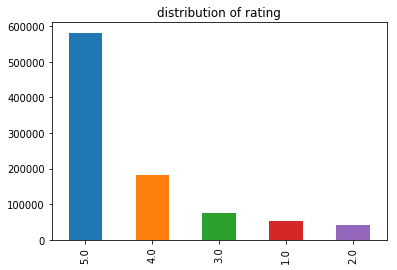

In [10]:
rating = df['overall'].value_counts()

plt.figure()
plt.title('distribution of rating')
rating.plot(kind='bar')

In [14]:
reviewer_rating = df.groupby('reviewerID')['overall'].count()
reviewer_rating.head(5)

reviewerID
A000715434M800HLCENK9    5
A00101847G3FJTWYGNQA     6
A00166281YWM98A3SVD55    5
A0046696382DWIPVIWO0K    5
A00472881KT6WR48K907X    7
Name: overall, dtype: int64

In [15]:
print('Max reviews: %s, Min reviews: %s' % (max(reviewer_rating), min(reviewer_rating)))
print('Median reviews: %s, Mean reviews: %s' % (np.median(reviewer_rating), round(np.mean(reviewer_rating),2)))
print('25%% reviews: %d,  75%% reviews: %d' % (np.percentile(reviewer_rating, 25), np.percentile(reviewer_rating, 75)))

Max reviews: 154, Min reviews: 1
Median reviews: 5.0, Mean reviews: 5.57
25% reviews: 3,  75% reviews: 7


In [26]:
df =df[:5000]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['overall'], random_state = 1, test_size=0.3)

In [89]:
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = 'english', 
                             lowercase = True, max_features = 10000)

X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
features = vectorizer.get_feature_names()

X_test_tfidf = vectorizer.transform(X_test).toarray()

In [49]:
random_text = np.random.choice(X_test,1)[0]
random_text

"Good base and good sound. I buy one and usually send them back to Koss for $9 (lifetime warranty) when they crap out.  I'm a heavy user and use these virtually every day anywhere from 1.5- 7 hours/day."

In [52]:
random_review_tfidf = vectorizer.transform([random_text]).toarray()
similarity = cosine_similarity(random_review_tfidf, X_train_tfidf)

In [102]:
def get_similar_reviews(target_reviews, n, similar_reviews):
    #Given a list of values, find the indices with the highest n values.
    #Return the labels for each of these indices.
    return [similar_reviews[i] for i in np.argsort(target_reviews)[::-1][:n]]   

In [54]:
n = 5
similar_reviews = get_similar_reviews(similarity[0], n, list(X_train))

In [69]:
print('My target review: \n%s\n' % (random_text))
print('top 5 similar reviews \n')

for i in range(n):
    print('No. %d review is: %s.\n' % (i+1, similar_reviews[i]))

My target review: 
Good base and good sound. I buy one and usually send them back to Koss for $9 (lifetime warranty) when they crap out.  I'm a heavy user and use these virtually every day anywhere from 1.5- 7 hours/day.

top 5 similar reviews 

No. 1 review is: Not much to say about this one. The item works as expected with no flaws or problems. It gets about 8 hours a day of use..

No. 2 review is: this camera bag is made good but it's way too small. It's good only if you are taking just one camera and no lens out for the day..

No. 3 review is: I don't know if they still come with a lifetime warranty but I'd buy them over again even if they didn't.It's hard to find a pair of in-ear headphones that are rated 16 to 23,000 Hz. And if my memory serves me correctly, this design was groundbreaking and every one else copied them. I've always enjoyed the isolating aspect as well as the bass response from them.I've used the lifetime warranty a few times over the last 10 years and have had no

#### Logistic Regression prediction model

In [143]:
LR = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)

LR.fit(X_train_tfidf,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=1,
                   warm_start=False)

In [144]:
print('The accuracy score for train data set is %f' % LR.score(X_train_tfidf,y_train))

The accuracy score for train data set is 0.680286


In [146]:
print('The accuracy score for train data set is %f' % LR.score(X_test_tfidf,y_test))

The accuracy score for train data set is 0.645333


In [150]:
CV_LR = cross_val_score(LR,X_train_tfidf,y_train,cv=5)
print("Accuracy for Logistic Regression: %0.2f" % (CV_LR.mean()))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]Accuracy for Logistic Regression: 0.67


#### Random Forest model

In [153]:
RF = RandomForestClassifier(n_estimators = 100,
                               max_depth = 25,
                               min_samples_split = 10,
                               min_samples_leaf = 10,
                               n_jobs= -1,
                               random_state = 1,
                               verbose = 0)

In [160]:
RF.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [161]:
print('The accuracy score for train data set is %f' % RF.score(X_train_tfidf,y_train))

The accuracy score for train data set is 0.666000


In [162]:
print('The accuracy score for train data set is %f' % RF.score(X_test_tfidf,y_test))

The accuracy score for train data set is 0.642000


In [164]:
CV_RF = cross_val_score(RF,X_train_tfidf,y_train,cv=5)
print("Accuracy for Random Forest Model: %0.2f" % (CV_RF.mean()))

Accuracy for Random Forest Model: 0.67


#### Further analysis

In [147]:
print ('Top 20 negative words by ranking are:\n%s.' % (", ".join(i for i in get_similar_reviews(LR.coef_[0], 20, features)))) 

Top 20 negative words by ranking are:
waste, maybe, return, didn, did, useless, windows, refund, money, ordered, doesnt, seller, tried, plug, amazon, thing, trash, immediately, work, time.


In [105]:
def get_bottom_values(lst, n, labels):
    #Given a list of values, find the indices with the lowest n values.
    #Return the labels for each of these indices.
    return [labels[i] for i in np.argsort(lst)[:n]] 

In [149]:
print ('Top 20 words by ranking are %s.' % (", ".join(i for i in get_bottom_values(LR.coef_[0], 10, features)))) 

Top 20 words by ranking are great, works, price, good, lens, needed, love, camera, like, quality.
